In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle
import matplotlib.pyplot as pyplot
import pickle
from matplotlib import style

In [2]:
data = pd.read_csv("student-mat.csv", sep=";")

In [3]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
data = data[["G1", "G2", "G3", "studytime", "failures", "absences"]]

In [5]:
data


,G1,G2,G3,studytime,failures,absences
0,5,6,6,2,0,6
1,5,5,6,2,0,4
2,7,8,10,2,3,10
3,15,14,15,3,0,2
4,6,10,10,2,0,4
...,...,...,...,...,...,...
390,9,9,9,2,2,11
391,14,16,16,1,0,3
392,10,8,7,1,3,3
393,11,12,10,1,0,0


In [6]:
predict = "G3"

In [7]:
X = np.array(data.drop([predict], 1))
y = np.array(data[predict])

In [8]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.1)

In [9]:
linear = linear_model.LinearRegression()

In [10]:
linear.fit(x_train, y_train)
acc = linear.score(x_test, y_test)
print(acc)

0.9144768537968853


In [11]:
print("Coefficient: \n", linear.coef_)
print("Intercept: \n", linear.intercept_)

Coefficient: 
 [ 0.17216236  0.96834102 -0.2237507  -0.32216435  0.04018292]
Intercept: 
 -1.5219377295609355


In [12]:
predictions = linear.predict(x_test)

In [13]:
for x in range(len(predictions)):
    print(predictions[x], x_test[x], y_test[x])

11.15925569520674 [11 12  3  1  4] 11
6.711849542646622 [6 8 1 1 0] 8
12.937470660784186 [13 13  2  0  2] 11
7.900741814565304 [10  8  2  0 10] 8
5.248506063140333 [7 7 2 3 5] 7
-0.7643025959921337 [7 0 2 0 0] 0
5.113276624875436 [ 6  6  2  2 22] 4
-0.2478155080970761 [10  0  2  0  0] 0
20.15354262690415 [18 19  1  0 10] 19
6.959614710468598 [9 8 4 0 2] 8
12.19879644993036 [12 12  2  0 12] 11
8.253506350196481 [ 9  9  2  2 15] 9
14.84537520440033 [12 15  1  0  0] 15
8.373192538399646 [ 7 10  3  1  0] 10
10.645033203220802 [10 11  2  0  6] 11
14.382090578982545 [14 14  1  0  4] 14
6.186246899549736 [8 7 2 0 0] 8
8.323868794513952 [10  9  3  0  2] 9
10.059610975498412 [ 8 11  2  0  0] 11
8.840305339194282 [9 9 1 0 8] 10
8.988093276921616 [10 10  4  0  0] 10
11.614937801675701 [12 11  1  0 16] 11
8.283660605830086 [8 9 2 0 4] 10
9.229190779380632 [10 10  4  0  6] 11
8.547594225333087 [8 9 1 0 5] 9
10.748260426025155 [12 11  2  0  0] 12
10.949149739800305 [10 11  1  0  8] 10
18.21529700946

In [14]:
predictions_df = pd.DataFrame(predictions)

In [15]:
predictions_df.head()

,0
0,11.159256
1,6.711850
2,12.937471
3,7.900742
4,5.248506


In [16]:
x_test_df = pd.DataFrame(x_test)

In [17]:
x_test_df.head()

,0,1,2,3,4
0,11,12,3,1,4
1,6,8,1,1,0
2,13,13,2,0,2
3,10,8,2,0,10
4,7,7,2,3,5


In [18]:
y_test_df = pd.DataFrame(y_test)

In [19]:
y_test_df.head()

,0
0,11
1,8
2,11
3,8
4,7


In [20]:
predictions_df.shape

(40, 1)

In [21]:
predictions_df.rename(columns={predictions_df.columns[0] : "Prediction"}).reset_index(drop=True)

,Prediction
0,11.159256
1,6.711850
2,12.937471
3,7.900742
4,5.248506
5,-0.764303
6,5.113277
7,-0.247816
8,20.153543
9,6.959615


In [22]:
x_test_df.rename(columns={x_test_df.columns[0] : "Grade 1", x_test_df.columns[1] : "Grade 2", x_test_df.columns[2] : "Study Time", x_test_df.columns[3] : "Failures", x_test_df.columns[4] : "Absences"})

,Grade 1,Grade 2,Study Time,Failures,Absences
0,11,12,3,1,4
1,6,8,1,1,0
2,13,13,2,0,2
3,10,8,2,0,10
4,7,7,2,3,5
5,7,0,2,0,0
6,6,6,2,2,22
7,10,0,2,0,0
8,18,19,1,0,10
9,9,8,4,0,2


In [23]:
print(len(x_test_df))

40


In [24]:
table = pd.concat([x_test_df, predictions_df], axis=1, ignore_index=True)

In [25]:
table.head()

,0,1,2,3,4,5
0,11,12,3,1,4,11.159256
1,6,8,1,1,0,6.711850
2,13,13,2,0,2,12.937471
3,10,8,2,0,10,7.900742
4,7,7,2,3,5,5.248506


In [26]:
table_df = table.rename(columns={table.columns[0] : "Grade 1", table.columns[1] : "Grade 2", table.columns[2] : "Study Time", table.columns[3] : "Failures", table.columns[4] : "Absences", table.columns[5] : "Predictions"})

In [27]:
table_df.head()

,Grade 1,Grade 2,Study Time,Failures,Absences,Predictions
0,11,12,3,1,4,11.159256
1,6,8,1,1,0,6.711850
2,13,13,2,0,2,12.937471
3,10,8,2,0,10,7.900742
4,7,7,2,3,5,5.248506


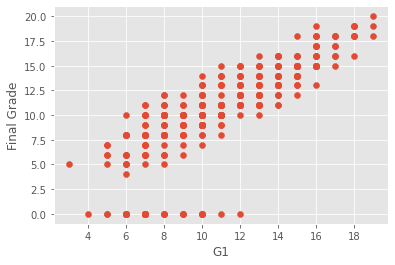

In [28]:
p ="G1"
style.use("ggplot")
pyplot.scatter(data[p], data["G3"])
pyplot.xlabel(p)
pyplot.ylabel("Final Grade")
pyplot.show()

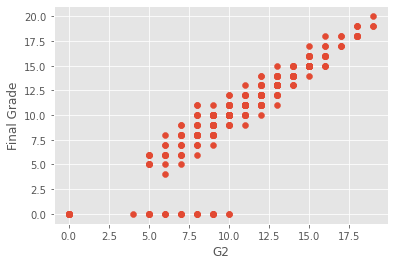

In [30]:
p ="G2"
style.use("ggplot")
pyplot.scatter(data[p], data["G3"])
pyplot.xlabel(p)
pyplot.ylabel("Final Grade")
pyplot.show()

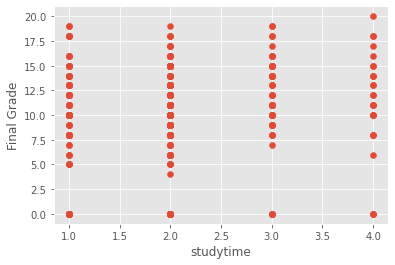

In [34]:
p ="studytime"
style.use("ggplot")
pyplot.scatter(data[p], data["G3"])
pyplot.xlabel(p)
pyplot.ylabel("Final Grade")
pyplot.show()